### [연속 펄스 부분 수열의 합](https://school.programmers.co.kr/learn/courses/30/lessons/161988?language=python3)

- 부분 수열의 최대값은 누적합 간의 차이의 최대값으로 측정이 가능하며
- 아래와 같은 펄스가 적용될 경우 최대값과 최소값 간의 차이(크기)가 그 값이 됨

In [ ]:
def solution(sequence):
    prefix_sums = [0]
    curr_sum = 0
    
    for i, val in enumerate(sequence):
        if i % 2 == 0:
            curr_sum += val
        else:
            curr_sum -= val
        prefix_sums.append(curr_sum)

    return max(prefix_sums) - min(prefix_sums)


### [징검다리 건너기](https://school.programmers.co.kr/learn/courses/30/lessons/64062)

- 처음 생각한 아래와 같은 코드로 정합성은 맞추지만 효율성을 맞추지 못함

In [ ]:
def solution(stones, k):
    # 기존 코드처럼 {인덱스: [남은횟수, 점프거리]} 구조 유지
    # 시작 지점을 위해 -1 인덱스 추가 (개울 왼쪽)
    data = {i: [stones[i], 1] for i in range(len(stones))}
    data[-1] = [float('inf'), 1] 
    
    answer = 0
    while True:
        curr = -1 # 시작 위치
        
        # 한 명의 친구가 건너는 과정
        while curr < len(stones):
            jump = data[curr][1]
            if jump > k: # 점프할 거리가 k보다 크면 종료
                return answer
            
            curr += jump # 다음 돌로 이동
            
            if curr < len(stones):
                data[curr][0] -= 1 # 돌 밟음
                
                if data[curr][0] == 0: # 돌이 방금 0이 되었다면 거리 갱신
                    # 현재 돌(curr)을 목적지로 하던 이전 돌을 찾아 거리 합산
                    prev = curr - 1
                    while prev >= -1:
                        if prev in data and data[prev][0] > 0:
                            # 이전 살아있는 돌의 점프 거리를 현재 돌의 점프 거리만큼 추가
                            data[prev][1] += data[curr][1]
                            break
                        prev -= 1
        answer += 1

- 이분 탐색으로 해결

In [ ]:
def solution(stones, k):
    # 건너갈 수 있는 친구의 수 범위를 이분 탐색으로 설정
    left = 1
    right = 200000000 # 제한 사항의 최대값
    answer = 0
    
    while left <= right:
        mid = (left + right) // 2 # mid명의 친구가 건널 수 있는지 확인
        
        # 연속으로 0이 되는(못 밟는) 돌의 개수 체크
        cnt = 0
        max_cnt = 0
        for s in stones:
            if s - mid < 0: # mid번째 친구가 밟기 전에 이미 0 이하가 됨
                cnt += 1
            else:
                cnt = 0
            
            if cnt > max_cnt:
                max_cnt = cnt
        
        # 연속된 0의 개수가 k이상이면 mid명은 못 건너감
        if max_cnt < k:
            answer = mid
            left = mid + 1
        else:
            right = mid - 1
            
    return answer

### [부대복귀](https://school.programmers.co.kr/learn/courses/30/lessons/132266)

- graph를 이용한 bfs로 해결

In [ ]:
def solution(n, roads, sources, destination):
    graph = [[] for _ in range(n + 1)]
    for u, v in roads:
        graph[u].append(v)
        graph[v].append(u)

    dist = [-1] * (n + 1)
    dist[destination] = 0
    frontier = [destination] 

    d = 0
    while frontier:
        d += 1
        next_frontier = []
        for curr in frontier:
            for neighbor in graph[curr]:
                if dist[neighbor] == -1:
                    dist[neighbor] = d
                    next_frontier.append(neighbor)
        frontier = next_frontier  # 다음 층으로 통째로 교체

    return [dist[s] for s in sources]

### [경주로 건설](https://school.programmers.co.kr/learn/courses/30/lessons/67259#)

- 교차로에서 만날 땐 일시적으로 비용이 더 크지만, 결과적으로 비용이 더 낮아지는 케이스(25번 케이스)에 대한 방법을 고려해야함

- 가장 간단한 방법은 도착지에서 역순으로 원점으로 향하게 하는 것이나 이건 원점 인근의 이러한 교차로가 없음을 이용한 해킹에 가까운 방법

In [ ]:
from collections import deque

# 왜째서인지 [0,0]에서 도착지점으로 향하는 경우, 마지막 25번 케이스가 틀리는데
# 도착지점에서 원점으로 돌아오게만 바꾸면 맞음...
# ???
def solution(board):
    N = len(board)
    cost = [[float('inf')] * N for _ in range(N)]
    cost[N-1][N-1] = 0
    
    directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    queue = deque([(N-1, N-1, 2, 0), (N-1, N-1, 3, 0)]) # (x, y, direction, cost)
    
    while queue:
        cx, cy, c_dir, c_cost = queue.popleft()
        for n_dir, (dx, dy) in enumerate(directions):
            nx, ny = cx+dx, cy+dy
            n_cost = c_cost + 100 if c_dir == n_dir else c_cost + 600
            
            if 0 <= nx < N and 0 <= ny < N and board[ny][nx] == 0 and cost[nx][ny] >= n_cost:
                cost[nx][ny] = n_cost
                queue.append((nx, ny, n_dir, n_cost))
    
    return cost[0][0]

- 교차로 문제를 해결하기 위해 아래 코드로 접근하였으나 비효율성 문제로 시간초과 발생...

In [ ]:
from collections import deque


def solution(board):
    N = len(board)
    cost = [[float('inf')] * N for _ in range(N)]
    cost[0][0] = 0
    
    directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    queue = deque([(0, 0, 0, 0), (0, 0, 1, 0)]) # (x, y, direction, cost)
    
    while queue:
        cx, cy, c_dir, c_cost = queue.popleft()
        for n_dir, (dx, dy) in enumerate(directions):
            nx, ny = cx+dx, cy+dy
            n_cost = c_cost + 100 if c_dir == n_dir else c_cost + 600
            
            if 0 <= nx < N and 0 <= ny < N and board[nx][ny] == 0 :
                if cost[nx][ny] >= n_cost:
                    cost[nx][ny] = n_cost
                    queue.append((nx, ny, n_dir, n_cost))
            
            
                nnx, nny, nn_cost = nx+dx, ny+dy, n_cost+100
                while 0 <= nnx < N and 0 <= nny < N and board[nnx][nny] == 0:
                    if cost[nnx][nny] >= nn_cost:
                        cost[nnx][nny] = nn_cost
                        queue.append((nnx, nny, n_dir, nn_cost))
                    nnx, nny, nn_cost = nnx+dx, nny+dy, nn_cost+100
            
    return cost[N-1][N-1]

In [17]:
from collections import deque

# 왜째서인지 [0,0]에서 도착지점으로 향하는 경우, 마지막 25번 케이스가 틀리는데
# 도착지점에서 원점으로 돌아오게만 바꾸면 맞음...
# ???

def print_matrix(matrix):
    print("[")
    for row in matrix:
        # 각 요소를 문자열로 변환하고 콤마로 연결하여 행 단위 출력
        print(f"  {row},")
    print("]")


def solution(board):
    N = len(board)
    cost = [[float('inf')] * N for _ in range(N)]
    cost[0][0] = 0
    
    directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    queue = deque([(0, 0, 0, 0), (0, 0, 1, 0)]) # (x, y, direction, cost)
    
    while queue:
        cx, cy, c_dir, c_cost = queue.popleft()
        for n_dir, (dx, dy) in enumerate(directions):
            nx, ny = cx+dx, cy+dy
            n_cost = c_cost + 100 if c_dir == n_dir else c_cost + 600
            
            if 0 <= nx < N and 0 <= ny < N and board[nx][ny] == 0 :
                if cost[nx][ny] >= n_cost:
                    cost[nx][ny] = n_cost
                    queue.append((nx, ny, n_dir, n_cost))
                    print('scout 01')
                    print_matrix(cost)
            
            
                nnx, nny, nn_cost = nx+dx, ny+dy, n_cost+100
                # print('='*80)
                # print(f'before: {cost}')
                while 0 <= nnx < N and 0 <= nny < N and board[nnx][nny] == 0:
                    if cost[nnx][nny] >= nn_cost:
                        cost[nnx][nny] = nn_cost
                        queue.append((nnx, nny, n_dir, nn_cost))
                        print('scout 02')
                        print_matrix(cost)
                    nnx, nny, nn_cost = nnx+dx, nny+dy, nn_cost+100
            
    print(cost)
    return cost[N-1][N-1]

In [18]:
board = [[0, 0, 0, 0, 0], [0, 1, 1, 1, 0], [0, 0, 1, 0, 0], [1, 0, 0, 0, 1], [1, 1, 1, 0, 0]]
solution(board)

scout 01
[
  [0, inf, inf, inf, inf],
  [100, inf, inf, inf, inf],
  [inf, inf, inf, inf, inf],
  [inf, inf, inf, inf, inf],
  [inf, inf, inf, inf, inf],
]
scout 02
[
  [0, inf, inf, inf, inf],
  [100, inf, inf, inf, inf],
  [200, inf, inf, inf, inf],
  [inf, inf, inf, inf, inf],
  [inf, inf, inf, inf, inf],
]
scout 01
[
  [0, 600, inf, inf, inf],
  [100, inf, inf, inf, inf],
  [200, inf, inf, inf, inf],
  [inf, inf, inf, inf, inf],
  [inf, inf, inf, inf, inf],
]
scout 02
[
  [0, 600, 700, inf, inf],
  [100, inf, inf, inf, inf],
  [200, inf, inf, inf, inf],
  [inf, inf, inf, inf, inf],
  [inf, inf, inf, inf, inf],
]
scout 02
[
  [0, 600, 700, 800, inf],
  [100, inf, inf, inf, inf],
  [200, inf, inf, inf, inf],
  [inf, inf, inf, inf, inf],
  [inf, inf, inf, inf, inf],
]
scout 02
[
  [0, 600, 700, 800, 900],
  [100, inf, inf, inf, inf],
  [200, inf, inf, inf, inf],
  [inf, inf, inf, inf, inf],
  [inf, inf, inf, inf, inf],
]
scout 01
[
  [0, 100, 700, 800, 900],
  [100, inf, inf, inf, inf

3000

- history map(cost)를 방향까지 고려한 3차원으로 작업

In [ ]:
from collections import deque

def solution(board):
    N = len(board)
    cost = [[[float('inf')] * 4 for _ in range(N)] for _ in range(N)]
    
    directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    
    # (x, y, direction, cost)
    queue = deque([(0, 0, 0, 0), (0, 0, 1, 0)])
    cost[0][0][0] = 0
    cost[0][0][1] = 0
    
    while queue:
        cx, cy, c_dir, c_cost = queue.popleft()
        
        if c_cost > cost[cx][cy][c_dir]:
            continue
            
        for n_dir, (dx, dy) in enumerate(directions):
            nx, ny = cx + dx, cy + dy
            
            n_cost = c_cost + (100 if c_dir == n_dir else 600)
            
            if 0 <= nx < N and 0 <= ny < N and board[nx][ny] == 0:
                if cost[nx][ny][n_dir] > n_cost:
                    cost[nx][ny][n_dir] = n_cost
                    queue.append((nx, ny, n_dir, n_cost))

    return min(cost[N-1][N-1])

### [다단계 칫솔 판매](https://school.programmers.co.kr/learn/courses/30/lessons/77486?language=python3)

- 그냥 문제 설명하는 방식대로 직독직풀 -> 예제는 풀리는데, 테스트 케이스가 안풀림

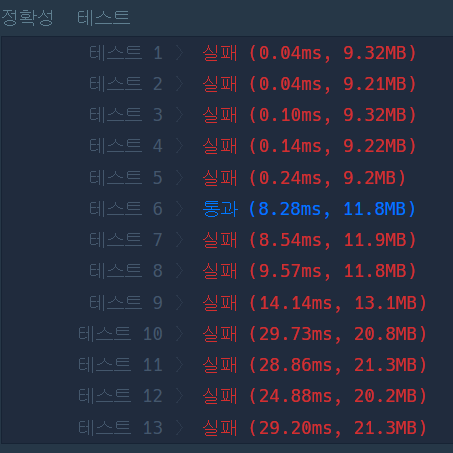

In [ ]:
from collections import defaultdict, deque

def solution(enroll, referral, seller, amount):
    GEN = defaultdict(int)
    COMBI = deque([(e, r) for e, r in zip(enroll, referral)])
    
    while COMBI:
        en, re = COMBI.popleft()
        if re == '-':
            GEN[en] = 1
        elif re in GEN.keys():
            GEN[en] = GEN[re]+1
        else:
            COMBI.append((en, re))
        
    generation = defaultdict(list)
    for name, gen in GEN.items():
        generation[gen].append(name)
    
    sales = defaultdict(int)
    for name, amt in zip(seller, amount):
        sales[name] = 100 * amt
        
    last_gen = max(generation.keys())
    COMBI = {e:r for e, r in zip(enroll, referral)}
    while last_gen:
        targets = generation[last_gen]
        for target in targets:
            if target in sales.keys():
                sale = sales[target]
                share = int(sale*0.1)
                sales[target] = sale - share
                sales[COMBI[target]] += share
        last_gen -= 1

    answer = [sales[name] if name in sales.keys() else 0 for name in enroll]
    return answer